In [6]:
import sys 
import os 
from pathlib import Path

os.chdir(Path.cwd()/'ox_thesis')
print(Path.cwd())
sys.version

/Users/valler/Python/OX_Thesis/OX_thesis


'3.8.6 (v3.8.6:db455296be, Sep 23 2020, 13:31:39) \n[Clang 6.0 (clang-600.0.57)]'

In [8]:
import numpy as np
import pandas as pd
from src import Models
from src import Evaluate
from src import DataImport
import matplotlib.pyplot as plt
from pathlib import Path

df = DataImport.data_reader(bio=False)
df_bio = DataImport.data_reader(bio=True)
domains = DataImport.domain_dict()
df_by_us = DataImport.data_reader_by_us(bio=False)


In [9]:
def characteristic_compare(df_by_us, df_author):
    null_records=pd.DataFrame(columns=['column','dataset_mark','max','min','mean','uniques','null'])

    count=0
    df_by_us.rename(columns={'death':'deathYN','deathYear':'death_year','deathMonth':'death_month','ZwealthT':'Zwealth', 'ZincomeT':'Zincome'},inplace=True)
    for column in df_by_us.columns:
        if column in list(df_author.columns):

            author_column  = df_author.loc[:,column].replace({' ':None,'True':1,'False':0}).astype(float)
            null_records = null_records.append({'column':column, 'dataset_mark':'author', 'max':max(author_column), 'min':min(author_column), 'mean':np.mean(author_column),'uniques':len(author_column.unique()), 'null':author_column.isnull().sum()},
                                               ignore_index=True)

            count+=1
        else:
            continue

        our_column=df_by_us[column]
        our_column = our_column.replace({' ': None, 'True': 1, 'False': 0}).astype(float)
        null_records=null_records.append({'column':column,'dataset_mark':'us','max':max(our_column),'min':min(our_column), 'mean':np.mean(our_column),'uniques':len(our_column.unique()),'null':our_column.isnull().sum()},ignore_index=True)

    return null_records



# Figures1_fig1_death_timeline

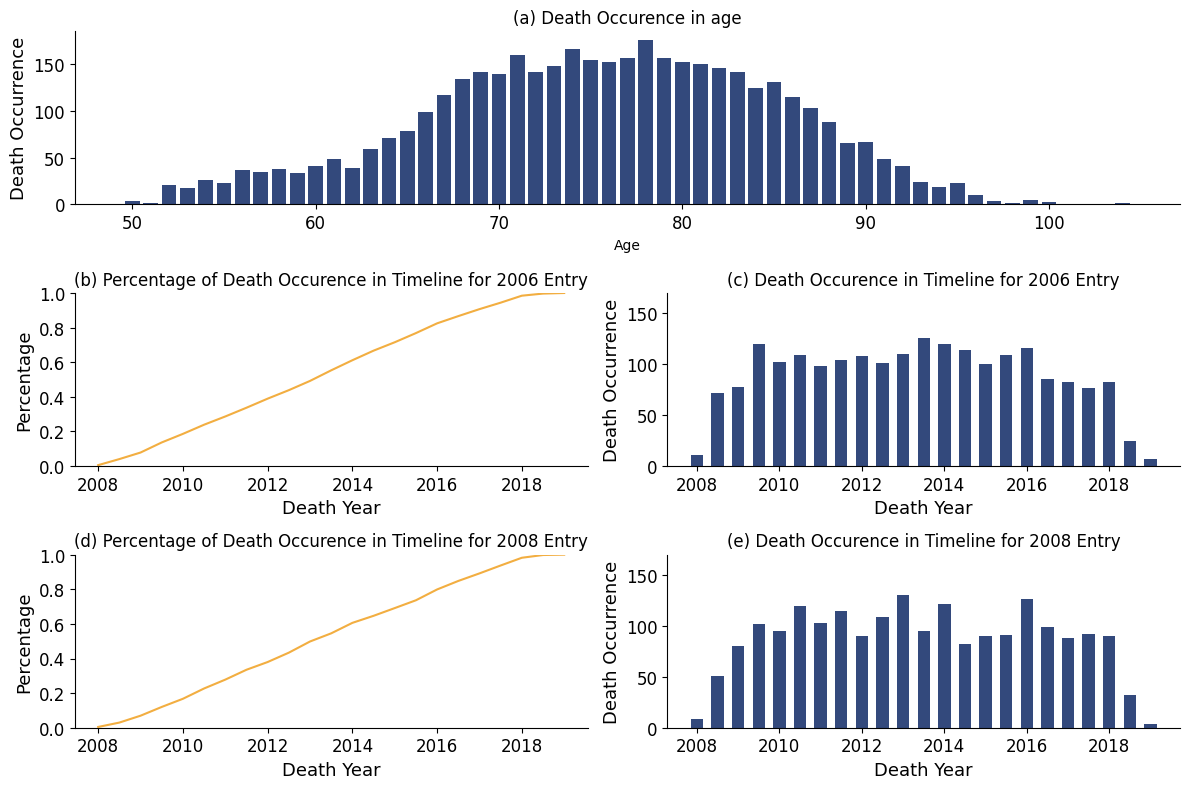

In [11]:
color_yellow='#F1A52C'
color_blue='#001C5B'
# ------------------------
# Figure1
# ------------------------
fontsize_ticks = 12
fontsize_labels = 13

df_deaths= pd.DataFrame(df_by_us[['death','age']].value_counts())
df_deaths=df_deaths.reset_index(drop=False)
df_deaths=df_deaths.loc[df_deaths['death']==1,]


df_by_us['deathYR_half']=[x if y<=6 else x+0.5 for x,y in zip(df_by_us['death_year'],df_by_us['death_month'])]
df_deaths_time=pd.DataFrame(df_by_us[['death','deathYR_half','interview_year']].value_counts())
df_deaths_time=df_deaths_time.reset_index(drop=False)
df_deaths_time=df_deaths_time.loc[df_deaths_time['death']==1,]



plt.figure(figsize=(12, 8))
fig = plt.gcf()
fig.subplots_adjust(left=0.08,right=0.95,top=0.95,bottom=0.1)
# row=0
ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=4)
ax1.bar(df_deaths['age'],df_deaths[0],color=color_blue,alpha=0.8)
ax1.set_xlabel('Age')
ax1.set_title('(a) Death Occurence in age')
ax1.set_ylabel('Death Occurrence',size=fontsize_labels)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# row=1,0
ax2 = plt.subplot2grid((3, 4), (1, 0), colspan=2)
temp=df_deaths_time.loc[df_deaths_time['interview_year']==2006,]
temp=temp.sort_values(by='deathYR_half')
temp['cumulative']=[sum(list(temp[0])[0:x]) for x in np.arange(1,len(list(temp[0]))+1,1)]

ax2.plot(temp['deathYR_half'],temp['cumulative']/sum(temp[0]),color=color_yellow,alpha=0.9)
ax2.set_ylim(0,1)
ax2.set_title('(b) Percentage of Death Occurence in Timeline for 2006 Entry')
ax2.set_xlabel('Death Year',size=fontsize_labels)
ax2.set_ylabel('Percentage',size=fontsize_labels)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
# row=1,1

ax2_1 = plt.subplot2grid((3, 4), (1, 2), colspan=2)
temp=df_deaths_time.loc[df_deaths_time['interview_year']==2006,]
temp=temp.sort_values(by='deathYR_half')

ax2_1.bar(temp['deathYR_half'],temp[0],width=0.3,color=color_blue,alpha=0.8)
ax2_1.set_ylim(0,170)
ax2_1.set_title('(c) Death Occurence in Timeline for 2006 Entry')
ax2_1.set_xlabel('Death Year',size=fontsize_labels)
ax2_1.set_ylabel('Death Occurrence',size=fontsize_labels)
ax2_1.spines['top'].set_visible(False)
ax2_1.spines['right'].set_visible(False)
ax2_1.tick_params(axis='both', which='major', labelsize=fontsize_ticks)

# The last one is spread on 1 column only, on the 4th column of the second line.
ax3 = plt.subplot2grid((3, 4), (2, 0), colspan=2)
temp=df_deaths_time.loc[df_deaths_time['interview_year']==2008,]
temp=temp.sort_values(by='deathYR_half')
temp['cumulative']=[sum(list(temp[0])[0:x]) for x in np.arange(1,len(list(temp[0]))+1,1)]


ax3.set_title('(d) Percentage of Death Occurence in Timeline for 2008 Entry')
ax3.plot(temp['deathYR_half'],temp['cumulative']/sum(temp[0]),color=color_yellow,alpha=0.9)
ax3.set_ylim(0,1)
ax3.set_xlabel('Death Year',size=fontsize_labels)
ax3.set_ylabel('Percentage',size=fontsize_labels)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(axis='both', which='major', labelsize=fontsize_ticks)

ax3_1 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
ax3_1.set_ylim(0,170)
ax3_1.set_title('(e) Death Occurence in Timeline for 2008 Entry')
ax3_1.bar(temp['deathYR_half'],temp[0],width=0.3,color=color_blue,alpha=0.8)
ax3_1.set_xlabel('Death Year',size=fontsize_labels)
ax3_1.set_ylabel('Death Occurrence',size=fontsize_labels)
ax3_1.spines['top'].set_visible(False)
ax3_1.spines['right'].set_visible(False)
ax3_1.tick_params(axis='both', which='major', labelsize=fontsize_ticks)


fig.tight_layout()
# Show the graph
# plt.savefig(Path.cwd()/'graphs/fig1_death_timeline.pdf')
plt.show()



# Figures-fig2_top_10_continuous

Current Smoker & -0.768 & -0.749 & 0.116 & 0.125 \\
History of Smoking & 0.135 & -0.137 & 0.567 & 0.431 \\
Alcohol Abuse & -0.862 & -0.863 & 0.069 & 0.068 \\
History of Divorce & -0.647 & -0.372 & 0.177 & 0.314 \\
Never Married & -0.947 & -0.936 & 0.027 & 0.032 \\
History of Unemployment & -0.913 & -0.746 & 0.043 & 0.087 \\


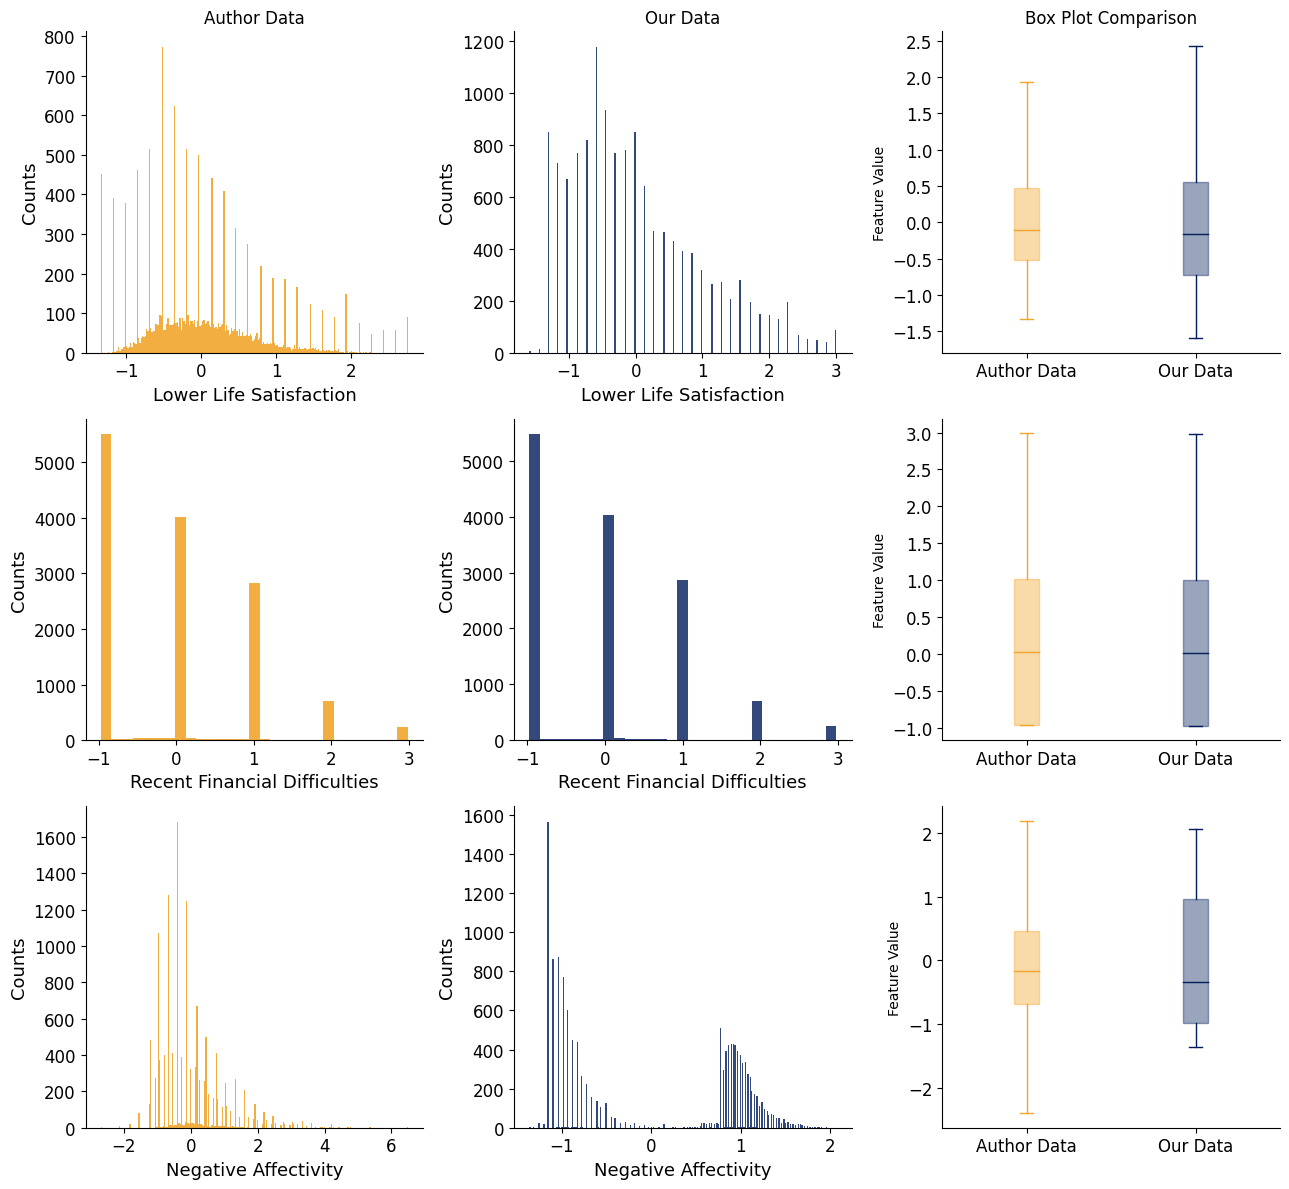

In [14]:


# ------------------------
# Figure 2
# ------------------------

var_dict=DataImport.variable_dict()
top_10_cols_binary=['currsmokeYN','eversmokeYN','alcoholYN','everdivorced','nevermarried','everunemployed']
top_10_cols_continuous=['Zlifesatis','Zrecentfindiff','Znegaffect']

for var in top_10_cols_binary:
    positive_label_us = [1 if x >0 else 0 for x in df_by_us[var]]
    positive_label = [1 if x > 0 else 0 for x in df[var]]

    print(var_dict[var],'&',round(df_by_us[var].mean(),3),'&',round(df[var].mean(),3),'&',round(np.mean(positive_label_us),3),'&',round(np.mean(positive_label),3), '\\\\')


fontsize_ticks = 12
fontsize_labels = 13
fig,axis = plt.subplots(3,3)
plt.rcParams['figure.figsize']=[13,12]
fig.subplots_adjust(left=0.06, bottom=0.08,top=0.95,right=0.99)
count = 0
colors=[color_blue,color_yellow]
for (m,n),subplot in np.ndenumerate(axis):
    var = top_10_cols_continuous[count]
    if n ==0:

        axis[m,n].hist(df[var],bins=[231,29,238][count],color=color_yellow,alpha=0.9)
        axis[m, n].set_xlabel(var_dict[var],size=fontsize_labels)
        axis[m, n].set_ylabel('Counts',size=fontsize_labels)
        if m ==0:
            axis[m,n].set_title('Author Data')

    elif n==1:
        axis[m, n].hist(df_by_us[var], bins=[231,29,238][count],color=color_blue,alpha=0.8)
        axis[m, n].set_xlabel(var_dict[var],size=fontsize_labels)
        axis[m, n].set_ylabel('Counts',size=fontsize_labels)
        if m ==0:
            axis[m,n].set_title('Our Data')
    else:
        box_1 = axis[m, n].boxplot(df[var], positions=[1], labels=['Author Data'],
                           patch_artist=True, boxprops=dict(color=colors[1]), medianprops=dict(color=colors[1]),
                           whiskerprops=dict(color=colors[1]), capprops=dict(color=colors[1]), showfliers=False)
        box_0 = axis[m, n].boxplot(df_by_us[var], positions=[2], labels=['Our Data'],
                           patch_artist=True, boxprops=dict(color=colors[0]), medianprops=dict(color=colors[0]),
                           whiskerprops=dict(color=colors[0]), capprops=dict(color=colors[0]), showfliers=False)

        box = [box_1, box_0]
        # set the face color of boxes, which is the color of box
        for i in [0,1]:
            for patch in box[i]['boxes']:
                patch.set(facecolor=colors[np.abs(i-1)], alpha=0.4)
        axis[m, n].set_ylabel('Feature Value')
        if m ==0:
            axis[m,n].set_title('Box Plot Comparison')
        count += 1
    axis[m, n].spines['top'].set_visible(False)
    axis[m, n].spines['right'].set_visible(False)
    axis[m,n].tick_params(axis='both', which='major', labelsize=fontsize_ticks)

fig.tight_layout()
#plt.savefig(Path.cwd()/'graphs/top_10_continuous.pdf')

plt.show()